## Exploring and pre-processing the data
The dataset contains **1500 rows and 8 columns** in total with missing values present in the "web_browser" and "reviewer_age" columns. The datset has one "web_browser" with 150 rows of missing data store as "NA" and the "reviewer_age" column has 105 missing values stored as "-". I have validated the data and pre-processed the data according to the instructions in the project description.

* owned: Same as description. Nominal data with no missing values. Confirms whether the reviewer owns or does not own a moped. No changes were made.
* model: Same as description. Nominal data with no missing values. lists all six possible values specified in the project description. No changes were made.
* review_month: The review_month column did not exactly match the format give given (i.e. mmm format) because some records contained a numerical value and a hyphen. for this I used the regular expression package to remove all numerical and special characters from each record in the review_month column, the resulting data in each record is now just the english short format (mmm) 
* web_browser: The web_browser column does contain nominal data as specified in the description however, there are NA values stored in some records. I replaced the NA or missing values with "unknown".
* reviewer_age: The reviewer_age column is discrete data as specified in the description however, there are missing values which are represented by the "-" characer. I replaced every instance of "-" which represented a missing value with the average age.
* primary_use: The primary_use column is nominal as specified in the description. The only values present are either commuting or leisure as specified in the description. No changes were made.
* value_for_money: The value_for_money column is as described. It contains discrete data with no missing values and all records store a rating out of 10 from 1-10. No changes were made.
* overall_rating: The overall_rating column is as described and contains continuous data with no missing values and all values fall between 0 and 25. No changes were made.

After the data validation the dataset continues to contain **1500 rows and 8 columns**. 3 columns were modified in the dataset: review_month to match the desired english short format (mmm), web_browser to replace all NA's with 'unknown', and reviewer_age to replace all missing values stored as '-' with the average age.


## Original Dataset

In [3]:
import pandas as pd
df =  pd.read_csv('data.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29
...,...,...,...,...,...,...,...,...
1495,1,Nielah-Eyden,18-May,Chrome,-,Leisure,6/10,18.76
1496,1,Nielah-Eyden,11-Mar,NaN,39,Commuting,5/10,18.56
1497,1,Nielah-Eyden,10-Nov,Chrome,21,Commuting,8/10,20.22
1498,0,Nielah-Eyden,Nov,Safari,45,Commuting,3/10,18.51


## Validate Categorical variables

In [4]:
cat = ['owned','make_model','review_month','web_browser','primary_use']
for column in cat:
    print(df[column].value_counts())

1    890
0    610
Name: owned, dtype: int64
Nielah-Eyden     652
Lunna-Eyden      329
Lunna-Keetra     178
Hoang-Keetra     124
Hoang-Eyden      124
Nielah-Keetra     93
Name: make_model, dtype: int64
Sep       73
Mar       72
May       68
Nov       67
Apr       65
          ..
10-Jul     1
18-Aug     1
14-Apr     1
20-Sep     1
06-Aug     1
Name: review_month, Length: 332, dtype: int64
Chrome     698
IE         239
Firefox    233
Safari     133
Opera       24
Android     23
Name: web_browser, dtype: int64
Commuting    1095
Leisure       405
Name: primary_use, dtype: int64


## Validate Numerical values

In [5]:
df.describe()

,owned,overall_rating
count,1500.000000,1500.000000
mean,0.593333,17.138907
std,0.491375,2.445566
min,0.000000,11.690000
25%,0.000000,15.320000
50%,1.000000,18.240000
75%,1.000000,18.840000
max,1.000000,22.760000


## Check missing values stored as "NA" in columns

In [6]:
df.isna().sum()

owned                0
make_model           0
review_month         0
web_browser        150
reviewer_age         0
primary_use          0
value_for_money      0
overall_rating       0
dtype: int64

## Check missing values stored as "-" in the reviewer_age column

In [7]:
dash_count = df['reviewer_age'].str.count('-').sum()
print(f'There are {dash_count} missing values in the reviewer_age column.')

There are 105 missing values in the reviewer_age column.


## Clean the review_month column to match the English short format (Jan, Feb, Mar, Apr etc.). 

In [20]:
df['review_month'] = df['review_month'].str.replace('[^a-zA-Z]+', '', regex=True)
df['review_month']

0       Oct
1       Jun
2       Oct
3       Nov
4       Sep
       ... 
1495    May
1496    Mar
1497    Nov
1498    Nov
1499    Jul
Name: review_month, Length: 1500, dtype: object

## Clean the web_browser column to replace all NA values with 'unknown'.

In [9]:
df['web_browser'].fillna('unknown', inplace =True)
df['web_browser']

0        Chrome
1       unknown
2        Chrome
3            IE
4        Chrome
         ...   
1495     Chrome
1496    unknown
1497     Chrome
1498     Safari
1499         IE
Name: web_browser, Length: 1500, dtype: object

## Clean reviewer_age column by replacing missing values (stored as '-') with the average age

In [10]:
df['reviewer_age'] = df['reviewer_age'].replace('-', '')
avg_age = df['reviewer_age'].mean()
df['reviewer_age'].fillna(avg_age, inplace=True)
df['reviewer_age']

0       23
1       24
2       28
3       41
4       33
        ..
1495      
1496    39
1497    21
1498    45
1499    37
Name: reviewer_age, Length: 1500, dtype: object

## Validate and display cleaned dataset

In [11]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1500 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,unknown,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,Sep,Chrome,33,Leisure,5/10,12.29
...,...,...,...,...,...,...,...,...
1495,1,Nielah-Eyden,May,Chrome,,Leisure,6/10,18.76
1496,1,Nielah-Eyden,Mar,unknown,39,Commuting,5/10,18.56
1497,1,Nielah-Eyden,Nov,Chrome,21,Commuting,8/10,20.22
1498,0,Nielah-Eyden,Nov,Safari,45,Commuting,3/10,18.51


## Validate categorical variables after cleaning 

In [12]:
cat = ['owned','make_model','review_month','web_browser','primary_use']
for column in cat:
    print(df[column].value_counts())

1    890
0    610
Name: owned, dtype: int64
Nielah-Eyden     652
Lunna-Eyden      329
Lunna-Keetra     178
Hoang-Keetra     124
Hoang-Eyden      124
Nielah-Keetra     93
Name: make_model, dtype: int64
Sep    141
Mar    141
May    138
Nov    126
Jan    126
Oct    125
Jun    124
Apr    123
Dec    117
Feb    115
Aug    114
Jul    110
Name: review_month, dtype: int64
Chrome     698
IE         239
Firefox    233
unknown    150
Safari     133
Opera       24
Android     23
Name: web_browser, dtype: int64
Commuting    1095
Leisure       405
Name: primary_use, dtype: int64


## Validate numerical values after cleaning

In [13]:
df.describe()

,owned,overall_rating
count,1500.000000,1500.000000
mean,0.593333,17.138907
std,0.491375,2.445566
min,0.000000,11.690000
25%,0.000000,15.320000
50%,1.000000,18.240000
75%,1.000000,18.840000
max,1.000000,22.760000


## Bar plot desciption
*In output below we can see the total number of reviews from owners and non owners in the bar plot and can see that owner reviews have the most number of observations. We can also see that the observations are not balanced across the owner and non owner categories with owner reviews being roughly 50% higher than that of non owners*

The owners category has the most number of observations
The observations are NOT balanced across categories of the variable 'owner'


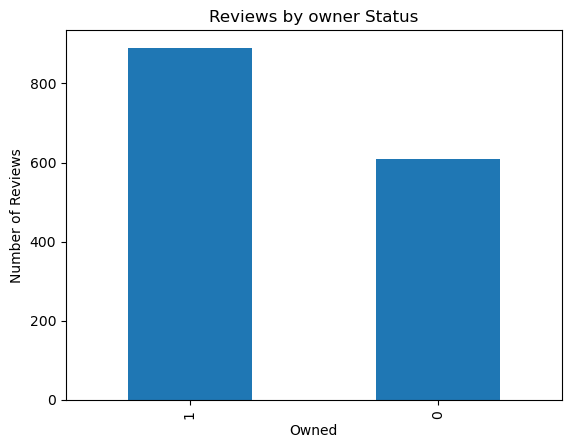

In [14]:
#counting the number of reviews from owners and non owners
import matplotlib.pyplot as plt
owner_counts = df ['owned'].value_counts()
#
owner_counts.plot(kind= 'bar')
plt.xlabel('Owned')
plt.ylabel('Number of Reviews')
plt.title('Reviews by owner Status')

most_owned = owner_counts.index[0]
if most_owned == 1:
    print(f'The owners category has the most number of observations')
else:
    print(f'The non owners category has the most number of observations')

if owner_counts[0] == owner_counts[1]:
    print("The observations are balanced across categories of the variable 'owner'")
else:
    print("The observations are NOT balanced across categories of the variable 'owner'")


## Describing the distribution and the histogram below
*Using the .describe() function we can see that the total number of observations are 1500 datapoits, an average review of 17.14, the standard deviation of the data is 2.45, the lowest review is 11.69, 25% of reviews are less than or equal to 15.32, 50% of the reviews are less than or equal to 18.24, and 75% of the reviews are less than or equal to 18.84, and the highest review is 22.76. As can be seen in the histogram and the result from the scipy skew() function the distribution is displaying a left skew in its distribution.*

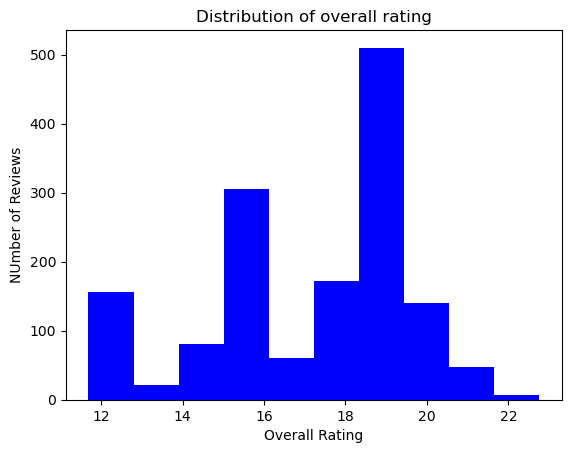

count    1500.000000
mean       17.138907
std         2.445566
min        11.690000
25%        15.320000
50%        18.240000
75%        18.840000
max        22.760000
Name: overall_rating, dtype: float64
-0.5901576982135008


In [15]:
from scipy.stats import skew
plt.hist(df['overall_rating'], bins = 10, color = 'blue')
plt.xlabel('Overall Rating')
plt.ylabel('NUmber of Reviews')
plt.title('Distribution of overall rating')
plt.show()
print(df['overall_rating'].describe())
print(skew(df['overall_rating']))

## Describing the relationship between owned variable and overall rating
*The boxplot below shows that there average overall rating for the owned category shows a much higher and more concentrated instance of better reviews with a few outliers past the upper bound of the distribution and more outliers in the lower bound of the distribution. We can see that the review ratings are more spread out in the non owner category with a lower oaverage overall rating*

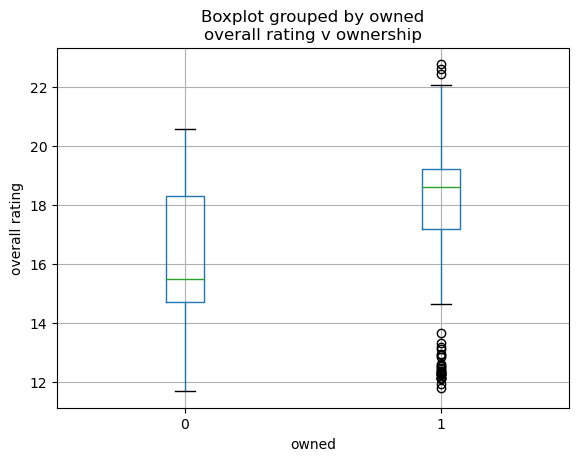

In [16]:
#box plot with owned as the grouping variable
df.boxplot(column= 'overall_rating', by = 'owned')
plt.title('overall rating v ownership')
plt.xlabel('owned')
plt.ylabel('overall rating')
plt.show()

## Determining what type of machine learning model should be used
*A regression based supervised machined learning model is appropirate for this problem, specifically a logistic regression base model given the binary nature of the owned category and the binary nature of the problem "predict whether a review is coming from and owner (1) or non owner (0)"*

## Building the appropriate machine learning model
*Regression based supervised machine learning model. Specifically a logistic regression based machine learning model.*

In [17]:
# Start coding here... 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(df[['overall_rating']], df['owned'], test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.7022222222222222


## Building a comparison model
*for the comparison model I chose a decision tree classifier as this is something I have used in a similar problem in my graduate data mining and machine learning course. it is a supervised machine learning model that was used in conjunction with a logistic regression based model to predict the binary classification problem. It seems to be the best comparison to the logistic regression model in my opinion*

In [18]:
# Start coding here... 
from sklearn.tree import DecisionTreeClassifier
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(df[['overall_rating']], df['owned'], test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_dt, y_train_dt)
y_pred_dt = dt.predict(x_test_dt)
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print("Decision Tree accuracy:", accuracy_dt)


Decision Tree accuracy: 0.6444444444444445


## Why were these models chosen
*the company's goal is a binary classification problem to predict whether a review came from an owner or not which is a binary outcome similar to credit risk scoring using a logistic regression. In this case building out a logistic regression supervised learning model is the ideal tool to achieve the company's goal. The decision tree model is a good comparison model becuase it is also frequently used for binary classification problems like the one presentated by the company, however decision tree models are used when the decision boundaries are are complex and nonlinear.*

## Model accuracy
*Based on the sklearn accuracy_score for each model I am confident that using the logistic regression based model will be able to predict whehter a review came from an owner or not with greater accuracy than the decision tree model*

In [19]:
# Start coding here... 
print("Logistic regression accuracy:", accuracy)
print("Decision Tree accuracy:", accuracy_dt)

Logistic regression accuracy: 0.7022222222222222
Decision Tree accuracy: 0.6444444444444445


## Explanation of the models and why the logistic regression outperformed the decision tree classifier model
*It is very likely that the logistic regression model performance better because the decision tree model mave have overfit the training and did not generalize well enough during testing. This is a common issue with decision tree models use in this manner. The logisitic regression model ourperformed very likely because of the binary decision boundary present in the data.*